# PART 1. Seattle AirBNB Price-Related Factors Study

# PART 2. Sentiment Analysis on Reviews

## PART 1

## Exploring the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
pd.set_option("max_columns", None)#display all columns

In [3]:
listings=pd.read_csv('./Seattle/listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [33]:
reviews=pd.read_csv('./Seattle/reviews.csv',encoding='ISO-8859-1')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,7202016,38917982,2015/7/19,28943674,Bianca,Cute and cozy place. Perfect location to every...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7202016,39087409,2015/7/20,32440555,Frank,Kelly has a great room in a very central locat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7202016,39820030,2015/7/26,37722850,Ian,"Very spacious apartment, and in a great neighb...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7202016,40813543,2015/8/2,33671805,George,Close to Seattle Center and all it has to offe...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7202016,41986501,2015/8/10,34959538,Ming,Kelly was a great host and very accommodating ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleansing

In [5]:
listings['price'].head()

0     $85.00
1    $150.00
2    $975.00
3    $100.00
4    $450.00
Name: price, dtype: object

In [12]:
prices = listings['price'].map(lambda p: int(p[1:-3].replace(",","")))#1,000 to 1000

In [14]:
prices.describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

In [8]:
import seaborn as sns

In [25]:
listings['price'] = prices

In [26]:
max(listings['price'])

1000

## About the Neighbourhood

In [42]:
#for price >800, seems all outliers
sort_order = listings.query('price<=800').groupby('neighbourhood_cleansed')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index#descending sort the median of price

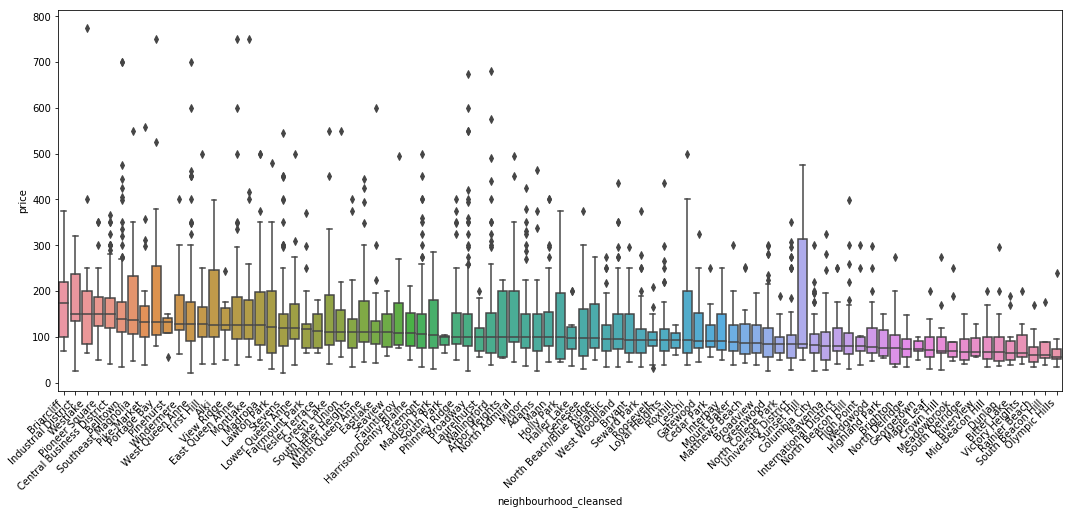

In [58]:
sns.boxplot(y='price', x='neighbourhood_cleansed', data=listings.query('price<=800'), 
            order=sort_order)

ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.rcParams['figure.figsize']=(18,10)#resize the image to better view
plt.show()

## About the Property Type

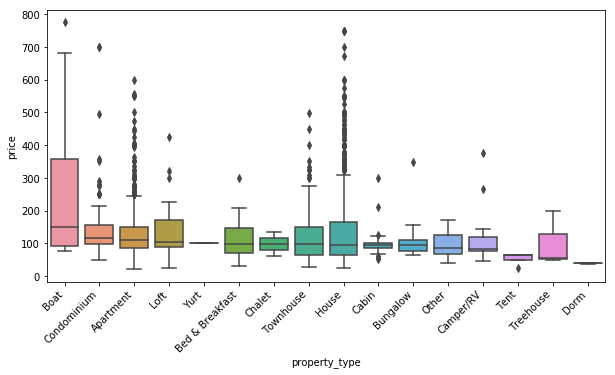

In [63]:
sort_order = listings.query('price <= 800')\
                    .groupby('property_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='property_type', data=listings.query('price <= 800'), order=sort_order)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.rcParams['figure.figsize']=(8,5)#resize the image to better view
plt.show()

## About the Room Type

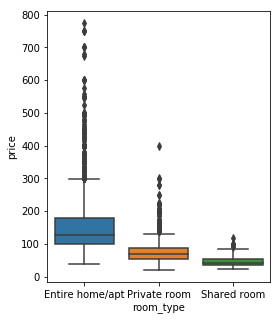

In [84]:
sort_order = listings.query('price <= 800')\
                    .groupby('room_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='room_type', data=listings.query('price <= 800'), order=sort_order)
plt.rcParams['figure.figsize']=(5,5)#resize the image to better view
plt.show()

## About the Bed Type

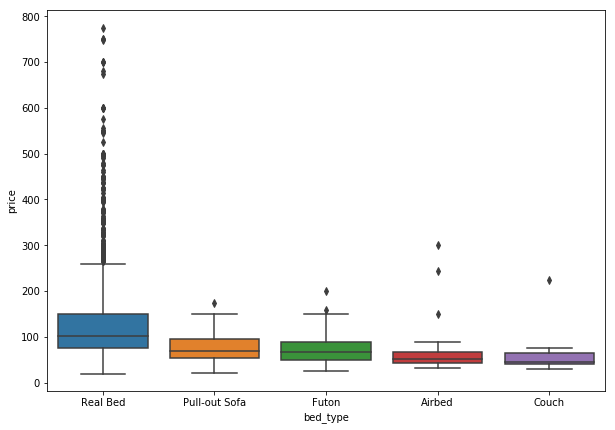

In [90]:
sort_order = listings.query('price <= 800')\
                    .groupby('bed_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='bed_type', data=listings.query('price <= 800'), order=sort_order)
plt.rcParams['figure.figsize']=(10,6)#resize the image to better view
plt.show()

## About Number of Bathrooms&Bedrooms

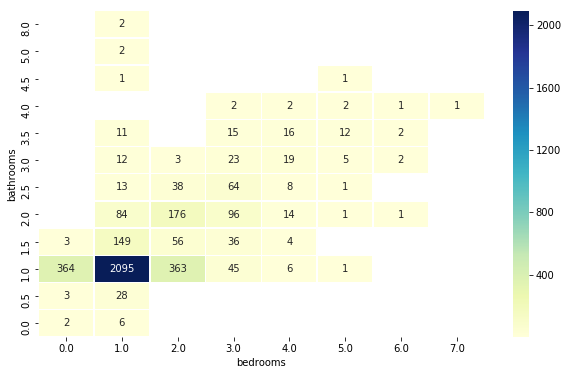

In [97]:
sns.heatmap(listings.query('price <= 800')\
                .groupby(['bathrooms', 'bedrooms'])\
                .count()['price']\
                .reset_index()\
                .pivot('bathrooms', 'bedrooms', 'price')\
                .sort_index(ascending=False),
            cmap="YlGnBu", fmt='.0f', annot=True, linewidths=0.5)

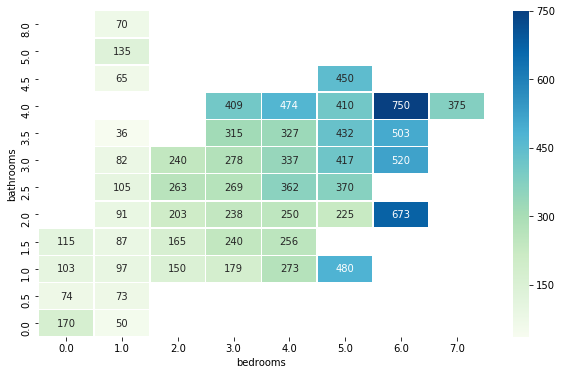

In [101]:
sns.heatmap(listings.query('price <= 800')\
                .groupby(['bathrooms', 'bedrooms'])\
                .mean()['price']\
                .reset_index()\
                .pivot('bathrooms', 'bedrooms', 'price')\
                .sort_index(ascending=False),
            cmap="GnBu", fmt='.0f', annot=True, linewidths=0.5)

## About the Amenities

In [104]:
listings['amenities']=listings['amenities'].map(
    lambda amns: "|".join([amn.replace("{", "").replace("}", "").replace('"', "")\
                           for amn in amns.split(",")])
)

In [128]:
np.concatenate([['TV','TABLE'],['TV','CHAIR']])

array(['TV', 'TABLE', 'TV', 'CHAIR'], dtype='<U5')

### Number of the Amenity Provided

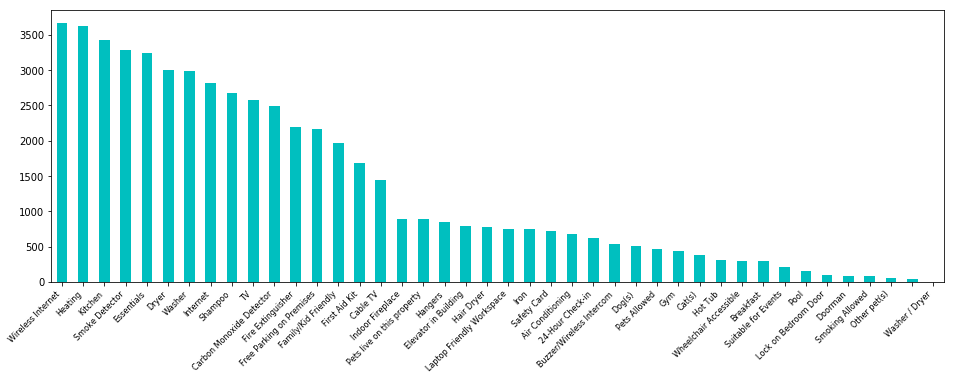

In [147]:
pd.Series(np.concatenate(listings['amenities'].map(lambda amns: amns.split("|"))))\
    .value_counts()\
    .plot(kind='bar',color='c')#inside "concat" are lists of amenities in one listing
                    #concatenate makes an array
                    #'numpy.ndarray' object has no attribute 'value_counts'
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)
plt.rcParams['figure.figsize']=(15,5)#resize the image to better view
plt.show()

### Mean Price with the Amenity Mentioned

In [152]:
amenities = np.unique(np.concatenate(listings['amenities'].map(lambda amns: amns.split("|"))))
#remove the "" one in amenities and create tuples (amenity,mean_price)
amenity_prices = [(amn, listings[listings['amenities'].map(lambda amns: amn in amns)]['price'].mean()) for amn in amenities if amn != ""]

In [154]:
amenity_srs = pd.Series(data=[a[1] for a in amenity_prices], index=[a[0] for a in amenity_prices])#for plot purpose to make amn as index

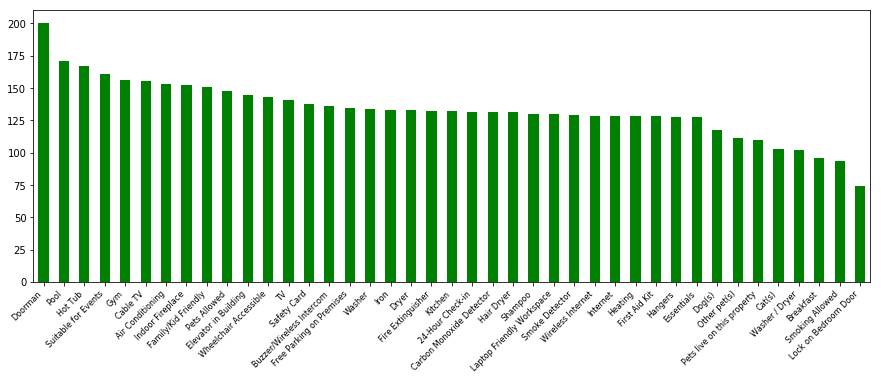

In [167]:
amenity_srs.sort_values(ascending=False).plot(kind='bar',color='g')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)
plt.show()

## PART 2

In [22]:
from langdetect import detect

In [9]:
reviews.shape

(84581, 14)

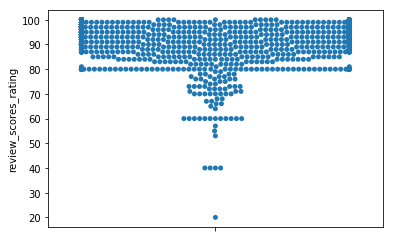

In [13]:
#do not rerun it! just once is fine!
sns.swarmplot(y=listings['review_scores_rating'].sort_values().reset_index(drop=True).dropna())

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
for sentence in reviews['comments'].values[:5]:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

Cute and cozy place. Perfect location to everything! 
compound: 0.7901, neg: 0.0, neu: 0.462, pos: 0.538, 
Kelly has a great room in a very central location. 
Beautiful building , architecture and a style that we really like. 
We felt guite at home here and wish we had spent more time.
Went for a walk and found Seattle Center with a major food festival in progress. What a treat.
Visited the Space Needle and the Chihuly Glass exhibit. Then Pikes Place Market. WOW.  Thanks for a great stay.
compound: 0.9872, neg: 0.0, neu: 0.609, pos: 0.391, 
Very spacious apartment, and in a great neighborhood.  This is the kind of apartment I wish I had!

Didn't really get to meet Kelly until I was on my out, but she was always readily available by phone. 

I believe the only "issue" (if you want to call it that) was finding a place to park, but I sincerely doubt its easy to park anywhere in a residential area after 5 pm on a Friday
compound: 0.8718, neg: 0.043, neu: 0.772, pos: 0.185, 
Close to Seattl

E:\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [37]:
# Snippet from:
# http://h6o6.com/2012/12/detecting-language-with-python-and-the-natural-language-toolkit-nltk/

from nltk.corpus import stopwords   # stopwords to detect language
from nltk import wordpunct_tokenize # function to split up our words

def get_language_likelihood(input_text):
    """Return a dictionary of languages and their likelihood of being the 
    natural language of the input text
    """
 
    input_text = input_text.lower()
    input_words = wordpunct_tokenize(input_text)
 
    language_likelihood = {}
    total_matches = 0
    for language in stopwords._fileids:
        language_likelihood[language] = len(set(input_words) &
                set(stopwords.words(language)))
 
    return language_likelihood
 
def get_language(input_text):
    """Return the most likely language of the given text
    """ 
    likelihoods = get_language_likelihood(input_text)
    return sorted(likelihoods, key=likelihoods.get, reverse=True)[0]

In [38]:
reviews_en = [r for r in reviews['comments'] if pd.notnull(r) and get_language(r) == 'english']

In [41]:
reviews_en_pd=pd.DataFrame(reviews_en,columns=['comments'])
#reviews_en_pd.to_csv('./Seattle/reviews_english.csv')

In [42]:
pscores = [sid.polarity_scores(comment) for comment in reviews_en]

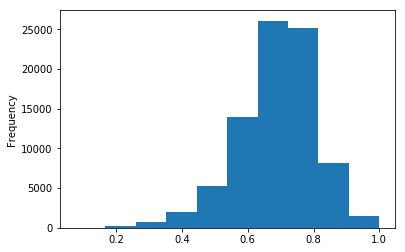

In [43]:
pd.Series([score['neu'] for score in pscores]).plot(kind='hist')

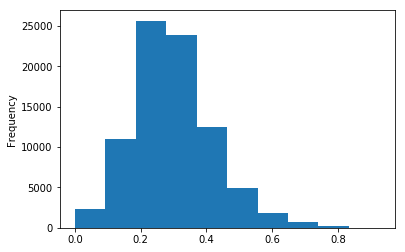

In [44]:
pd.Series([score['pos'] for score in pscores]).plot(kind='hist')

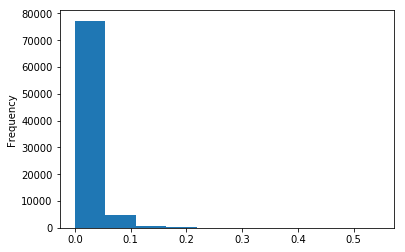

In [47]:
pd.Series([score['neg'] for score in pscores]).plot(kind='hist')

In [48]:
reviews_df = reviews[reviews.apply(lambda srs: pd.notnull(srs['comments']) and (get_language(srs['comments']) == 'english'), axis='columns')]

In [50]:
reviews_df.to_csv('./Seattle/reviews_english.csv')

In [51]:
reviews_en_pd.to_csv('./Seattle/comments_english.csv')